In [144]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Case study-2**
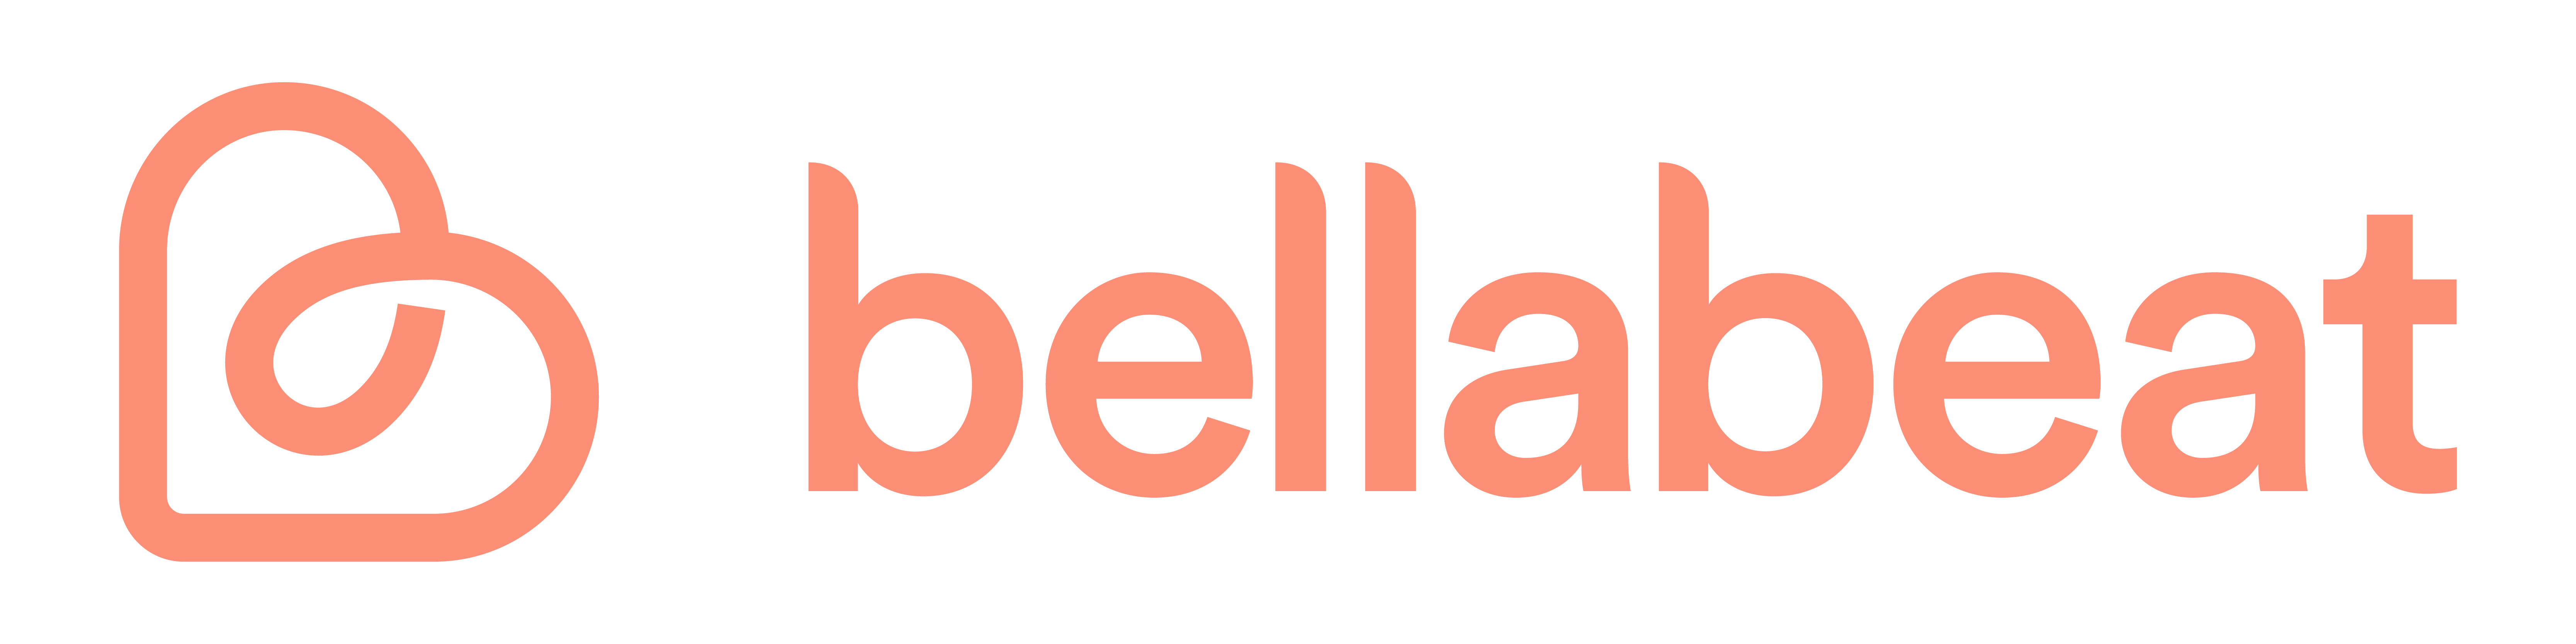

***How Can a Wellness Technology Company Play It Smart?***

# About the Company

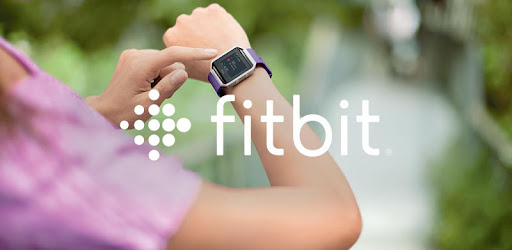

Bellabeat is a high-tech company that manufactures health-focused smart products including Bellabeat app, Leaf, Time and Spring. It also offers a subscription-based membership program for users giving them access to personalised guidance on having a healthy lifestyle. Bellabeat has positioned itself as a tech-driven wellness company for women.

Bellabeat has been investing extensively on digital marketing including Google Search and being active on social media platforms. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

# Key StakeHolders
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s co-founder; key member of the Bellabeat executive team

# Products:

1. **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits.
2. **Leaf**: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.
3. **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress.
4. **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.
5. **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users.

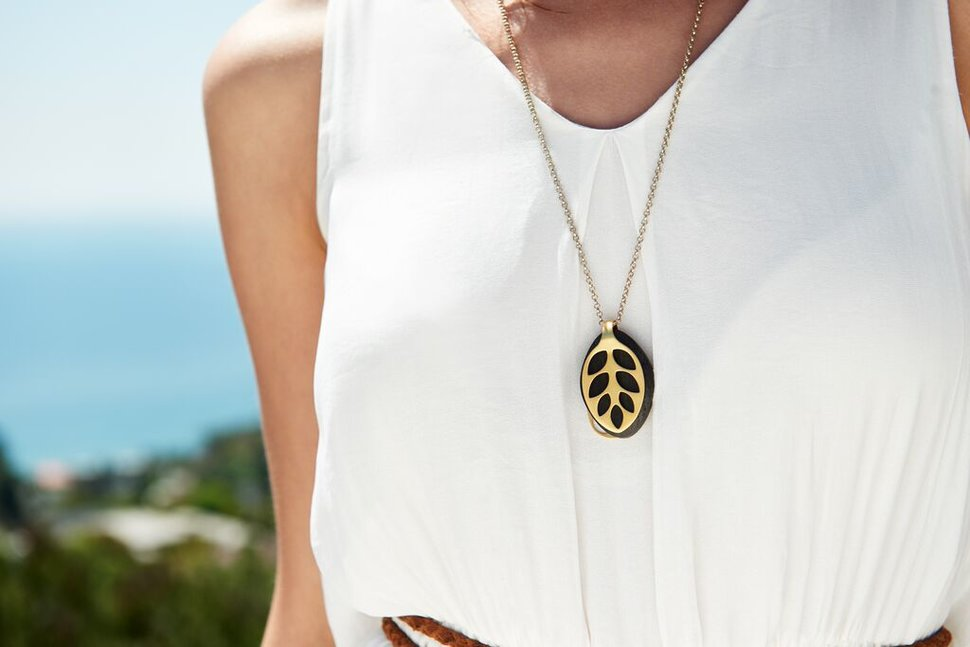

How  Fitbit's <Fitbit> [syncing](https://movespring.com/blog/how-syncing-your-fitness-tracker-works-8) works?

>**"The fitness tracker's sensor records data of accumulated steps in real-time, but the data stays local on the device. The fitness tracker will background sync the activity data to the device app on your phone  (i.e. the Fitbit app) at various intervals. Background syncing usually happens between 1–20 times per day and is up to the fitness tracker and its paired app to determine how often they sync."** - movespring.com

# **1. Ask Phase**

# Statement of business task

To focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, give high-level recommendations for how these trends can inform Bellabeat marketing strategy.

In one phrase we can say client requirement as:
 How do our users use our smart devices?

# **2. Prepare Phase**

### **Dataset Description:**

The data source used for our case study is ***FitBit Fitness Tracker Data***. This dataset is stored in Kaggle and was made available through Mobius.

* **License**: CC0: Public Domain

* **Last Updated**: 2020-12-16

* **Credibility Of Data**: Dataset avilable through mobius.This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.

# **3. Process and Analyse Phase**

I am using R in this project. R is an excellent programming language for data analysis and data visualization. Data cleaning effectively done in R. It can process large dataset faster compared to spreadsheets. It is also extensively used by many data enthuisiast.It has dynamic and active R community support. 

**Some of steps in this phase are:**

1. Inspect and remove missing values from the created data frame.
2. Field names standardized.
3. Remove Duplicates as it disturbs analysis.
4. Remove erroneous outliers to get exact trend.
5. Convert data values into consistent metrics.
6. Merge & split columns as required.
7. Sort records in necessary order.
8. Remove irrelevant/machine-dependent columns
9. Fix typos if any.

Let’s process data-frames of each dataset one by one.

#### 1. **Installing Packages and Loading Libraries**

We will install and use the following packages for our analysis:

* tidyverse
* dplyr
* skimr
* ggplot2
* tidyr
* ggpubr
* ggrepel

In [145]:

library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(reshape2)
library(scales)

### 2.Importing datasets

In [146]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
steps <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

In [147]:
head(activity)

### Preview Dataset

In [148]:
head(activity)
str(activity)

head(sleep)
str(sleep)

head(steps)
str(steps)


In [149]:
glimpse(activity)

In [150]:
str(steps)

In [151]:
glimpse(sleep)

### Fixing formatting

There are some problems with the timestamp data. So before analysis, I need to convert it to date time format and split to date and time.

In [152]:
# intensities
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")
# calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")
# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")
# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

### **Data Cleaning**

*  Check For Duplicate Rows

Let's check if there are duplicate observations in the these tables

In [153]:
# Check for number of duplicate rows

# Activity table
activity %>% 
  duplicated() %>% # return a logical vector telling which rows are duplicate rows (TRUE = duplicate)
  sum() # return the sum of duplicate rows

# Sleep table
sleep %>% 
  duplicated() %>% 
  sum()

# Weight table
weight %>% 
  duplicated() %>% 
  sum()

There are no duplicate rows in both daily_activity and weight table.

There are 3 duplicate rows in daily_sleep table. Let's identify and remove them.

In [154]:
# Extract the duplicate rows
sleep[duplicated(sleep),]

In [155]:
# Remove the duplicate rows
sleep <- sleep %>% distinct()

**Verification that there are no duplicates:**

In [156]:
sum(duplicated(sleep))

### **Exploring and Summarizing Data**

In [157]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

This information demonstrates us about number of participants in each datasets.

There are ***33*** participants in the **activity**, **calories** and **intensities** data sets, ***24*** in the **sleep** and only ***8*** in the **weight** data set. 8 participants is not significant to make any recommendations and conclusions based on this data.

Let’s have a look at summary statistics of the data sets:

In [158]:
# activity
activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

# explore num of active minutes per category
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
calories %>%
  select(Calories) %>%
  summary()
# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()
# weight
weight %>%
  select(WeightKg, BMI) %>%
  summary()

Some interesting discoveries from this summary:

Average sedentary time is 991 minutes or 16 hours. Definately needs to be reduced!

The majority of the participants are lightly active.

On the average, participants sleep 1 time for 7 hours.

Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps.

# **Merging Data**

Before beginning to visualize the data, I need to merge two data sets. I’m going to merge (inner join) activity and sleep on columns Id and date (that I previously created after converting data to date time format).

In [159]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

In [160]:
#To better visualize the data users are grouped into 4 categories based on for which of their activity types they have more minutes, this will be very useful to quickly see patterns and visualize them:
data_by_usertype <- merged_data %>%
summarise(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")), Calories, .group=Id) %>%
drop_na()

In [161]:
head(data_by_usertype)

In [162]:
# With this new table I can now visualize both the user type distribution and the calories burned for each user category present:
data_by_usertype %>%
group_by(user_type) %>%
summarise(total = n()) %>%
mutate(totals = sum(total)) %>%
group_by(user_type) %>%
summarise(total_percent = total / totals) %>%
ggplot(aes(user_type,y=total_percent, fill=user_type)) +
    geom_col(color = 'yellow')+
    scale_y_continuous(labels = scales::percent) +
    theme(legend.position="none") +
    labs(title="Distribution based on User Category", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

ggplot(data_by_usertype, aes(user_type, Calories, fill=user_type,size= Calories)) +
    geom_boxplot(color = 'brown') +
    theme(legend.position="none") +
    labs(title="Calories burnt by User Category", x=NULL) +
    theme(legend.position="none", text = element_text(size = 20),plot.title = element_text(hjust = 0.5))

In [163]:
head(data_by_usertype)

### Analysis:

* From the plot we notice that almost max portion of users are mostly sedentary or Lightly active users.
* It is also very interesting to observe that although sedentary or Lightly active users are the biggest category the Fairly active and most importantly, the Very active are the ones with more calories burned. 
* It's not a surprising result to notice but it confirms the hypothesis that the level of activity relates with the **calories burned** and so it's an important factor in any effort **to lose weight**.

In [164]:
# Now lets'check and plot the relation between Steps/Distance moved and Calories burned:

merged_data %>%
summarise(
distance = factor(case_when(
    TotalDistance < 4.5 ~ "< 4.5 mi",
    TotalDistance >= 4.5 & TotalDistance <= 7 ~ "4.5 > & < 7 mi",
    TotalDistance > 7 ~ "> 7 mi",
),levels = c("> 7 mi","4.5 > & < 7 mi","< 4.5 mi")),
steps = factor(case_when(
    TotalSteps < 6000 ~ "< 6k steps",
    TotalSteps >= 6000 & TotalSteps <= 10000 ~ "6k > & < 10k Steps",
    TotalSteps > 10000 ~ "> 10k Steps",
),levels = c("> 10k Steps","6k > & < 10k Steps","< 6k steps")),
Calories) %>%
ggplot(aes(steps,Calories,fill=steps)) +
    geom_boxplot(alpha = 0.8) +
    facet_wrap(~distance)+
    labs(title="Calories burned by Steps and Distance",x=NULL) +
    theme(legend.position="none", text = element_text(size = 7),plot.title = element_text(hjust = 0.5))+  xlab(" ")+xlab(" ")

**Analysis:**


* The above boxplot shows the calories burned by the three categories of steps based on the summary values which is faceted by the three categories of distance traveled. 
* This addresses the question of which aspect is more important to the calories burnt, the *steps or the distance traveled*
* Astonishingly if we observe it reveals that the most calories burned are the **"6k > & < 10k Steps"** and **"> 7 miles"** which might indicate some kind of running activity that allows the user to traverse **large distance with fewer number of steps**.

* Also the above visualization demonstrates the relation how the **"> 10k Steps"** in the mean distance category and the **"<6k Steps"** in the low distance category varies which portrays the fact that **speed** has high significance in **calories burnt**.

In [165]:
#Now let's focus on the sleep quality, for that I will now make categories for the sleeping time and I will make a new table with the sleeping categories percent for each individual user type:
sleepType_by_userType <- merged_data %>%
group_by(Id) %>%
summarise(
user_type = factor(case_when(
    SedentaryMinutes > mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Sedentary",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes > mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Lightly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes > mean(FairlyActiveMinutes) & VeryActiveMinutes < mean(VeryActiveMinutes) ~ "Fairly Active",
    SedentaryMinutes < mean(SedentaryMinutes) & LightlyActiveMinutes < mean(LightlyActiveMinutes) & FairlyActiveMinutes < mean(FairlyActiveMinutes) & VeryActiveMinutes > mean(VeryActiveMinutes) ~ "Very Active",
),levels=c("Sedentary", "Lightly Active", "Fairly Active", "Very Active")),
sleep_type = factor(case_when(
    mean(TotalMinutesAsleep) < 360 ~ "Bad Sleep",
    mean(TotalMinutesAsleep) > 360 & mean(TotalMinutesAsleep) <= 480 ~ "Normal Sleep",
    mean(TotalMinutesAsleep) > 480 ~ "Over Sleep",
),levels=c("Bad Sleep", "Normal Sleep", "Over Sleep")), total_sleep = sum(TotalMinutesAsleep) ,.groups="drop"
) %>%
drop_na() %>%
group_by(user_type) %>%
summarise(bad_sleepers = sum(sleep_type == "Bad Sleep"), normal_sleepers = sum(sleep_type == "Normal Sleep"),over_sleepers = sum(sleep_type == "Over Sleep"),total=n(),.groups="drop") %>%
group_by(user_type) %>%
summarise(
    bad_sleepers = bad_sleepers / total, 
    normal_sleepers = normal_sleepers / total, 
    over_sleepers = over_sleepers / total,
    .groups="drop"
)

In [166]:
#Now we can plot the data for each user type:
sleepType_by_userType_melted<- melt(sleepType_by_userType, id.vars = "user_type")

ggplot(sleepType_by_userType_melted, aes(user_type, value, fill = variable)) +
geom_bar(position = "dodge" ,stat = "identity",alpha = 0.7,color = 'darkblue') +
scale_y_continuous(labels = scales::percent) +
labs(x=NULL, fill="Sleep type") + 
theme(legend.position="top",text = element_text(size = 16),plot.title = element_text(hjust = 0.7)) 

### Analysis:

* This Bar plot exhibits the relation between the **activity level and sleep quality**
* The **sedentary users** we find the largest percentage of **bad sleepers**
* With *some activity* even though it is very less , we see a great increase of normal sleepers.
* Astonishing fact the analysis reveals is the decrease of **over sleepers**  in the most active categories. This portrays that there are people that dont like to spend lot of time sticking on bed .

# **...................................................................................**

**Now Lets observe the pattern of steps hourly**

In [167]:
steps<- steps %>% 
  rename(date_time = ActivityHour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

head(steps)

In [168]:
hourly_steps <- steps %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date)) 
  
head(hourly_steps)

In [169]:
hourly_steps %>%
  group_by(time) %>%
  summarize(average_steps = mean(StepTotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  labs(title = "Hourly steps throughout the day", x="", y=" ") + 
  scale_fill_gradient(low = "orange", high = "magenta")+
  theme(axis.text.x = element_text(angle = 90))


**Analysis:**

* The visualization displaysss that users are **more active** between **8am and 7pm**.

* They are walking **more steps** during lunch time from **12pm to 2pm** and evenings from **5pm and 7pm.**

# **4. Share Phase**

# Final Visualization

In [170]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point(color = 'brown') + geom_smooth() + labs(title="Total Steps vs. Calories")

**It displays positive correlation here between Total Steps and Calories, which becomes obvious that the more active users are, the more calories they burn.**

In [171]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point(color= 'orange')+geom_smooth(color = 'lightgreen')+ labs(title="Total Minutes Asleep vs. Total Time in Bed")

* The above plot exhibits the relation between Total Minutes Asleep and Total Time in Bed which looks linear. 

**So if the Bellabeat users want to improve their sleep, app should give a notification to go to sleep daily on time.**



#### Now Let's analyze intensities data over hourly time.

In [172]:
int_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=int_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='purple') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

**Analysis** 

* The above plot reveals that people are more active between 5 am and 10pm.

* Most activity happens between 5 pm and 7 pm - I suppose, that people go to a gym or for a walk after finishing work. We can use this time in the Bellabeat app to remind and motivate users to go for a run or walk.



### Let's look at the relationship between Total Minutes Asleep and Sedentary Minutes.

In [173]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
geom_point(color='blue') + geom_smooth(color = 'darkblue') +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

**Analysis**

* The plot clearly demonstartes that the **negative relationship** between Asleep time and Sedentary Minutes.

* So, to conclude if Bellabeat users want to **improve their sleep**, Bellabeat app can recommend **reducing sedentary time **
* Key Marketing Strategy here is: In order to reduce sedantary time of users Bellabeat can come up with a game based approach reaching different levels if users walk for certain distance and rewarding the users with some points to be able to buy premium gadgets of Bellabeat.

Also point to be remembered is that we need to support this insights with more data, because correlation between some data actually doesn’t mean causation.

# **.....................................................................................**

# **4.  Act Phase**

# Summarizing recommendations for the business

We already know, collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

After analyzing ***FitBit Fitness Tracker Data***, I found some **insights which would help Bellabeat grow by influencing its marketing strategy to make some changes.**

**Women are the target audience of the stake holders**

* So to the analysis, Women here are who work full-time jobs (as per hourly intensity data) and spend a lot of time focused on computer/in a meeting on work they are doing (as per the sedentary time data)

* These women do some light activity to stay healthy (as per the activity type analysis). Even though they need to improve their everyday activity to have health benefits. 

* So the women might need some knowledge about developing healthy habits or motivation to keep going.

**Limitation**: There is no gender information about the participants, So it is assumed that all genders were presented and balanced in this data set.



### **Bellabeat marketing campaign vital quote:**

Bella Beat is not another fitness tracker app alone but also it’s self guide or a  supporting friend who empowers women to balance full personal and professional life and healthy habits and routines by educating and motivating them through daily app recommendations.

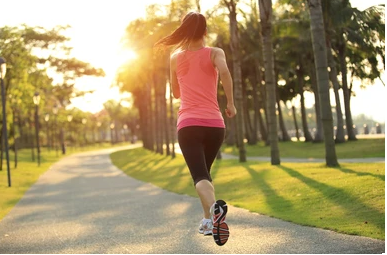

### **Recommendations for the Bellabeat app**

1. Average total steps per day are 7638 which a little bit less for having health benefits for according to the CDC research. They found that taking 8,000 steps per day was associated with a 51% lower risk for all-cause mortality (or death from all causes). Taking 12,000 steps per day was associated with a 65% lower risk compared with taking 4,000 steps. Bellabeat can **encourage people** to take at least **8000 steps** explaining the benefits for their health.

2. If users want to lose weight, it’s probably a good idea to control daily calorie consumption. Bellabeat can **suggest** some ideas for **low-calorie lunch and dinner**.

3. If users want to improve their sleep, Bellabeat should consider using **app notifications to go to bed.**

4. Most activity happens between *12pm - 2pm and 5 pm - 7 pm* .

   At that time, people would go to a gym or for a walk after finishing work and they walk or do some activity during lunch hours. Bellabeat can use this time to **remind and motivate** users to go for a **run or walk.**

5. According to the analysis **better quality sleep** is linked to the **activity level** which interestingly improves the sleep and in general to lowers stress and improving your quality of life. So startegy here is recommending to perform some sort of activity which helps users improves health quality also leads to users to use app more frequently to obsserve their pattern of activity.

6. As an idea: if users want to improve their sleep, the Bellabeat app can recommend reducing sedentary time.
**Key Marketing Strategy** here is: In order to reduce sedantary time of users Bellabeat can come up with a game based approach reaching different levels if users walk for certain distance and rewarding the users with some points to be able to buy premium gadgets of Bellabeat.

# **...............................................................................**
#  ................................ Thank you ...................................
# **...............................................................................**